<a href="https://colab.research.google.com/github/Hasifa1/Machine-learning-models/blob/main/Maleria_outbreak_detection_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/outbreak_detect.csv')

In [54]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [55]:
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
21,31.0,23.0,73.35,4.97,10659,612,Yes
22,30.0,23.0,86.81,7.21,9041,418,No
23,30.0,22.0,78.80,3.12,11265,404,Yes
24,33.0,22.0,73.71,1.75,9233,212,No
25,1.0,24.0,84.57,11.15,9693,482,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [57]:
df.describe()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf
count,24.000000,25.000000,26.000000,26.000000,26.000000,26.000000
mean,33.458333,23.960000,69.611538,7.035769,7951.307692,412.346154
std,8.203812,2.805946,15.378182,9.233042,3617.947006,217.488564
min,1.000000,18.000000,34.740000,0.000000,416.000000,26.000000
25%,31.000000,23.000000,57.915000,0.095000,5487.500000,213.000000
50%,33.500000,24.000000,73.290000,4.095000,9271.500000,414.000000
75%,36.750000,24.000000,84.245000,11.150000,10702.500000,532.250000
max,45.000000,32.000000,88.770000,41.400000,13154.000000,838.000000


In [58]:
df.shape

(26, 7)

In [59]:
df.isnull().sum()

maxTemp        2
minTemp        1
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [60]:
import math
mean_mxt=df['maxTemp'].mean()

In [61]:
mean_mxt=math.floor(mean_mxt)
mean_mxt

33

In [62]:
df['maxTemp']=df['maxTemp'].fillna(mean_mxt)

In [63]:
mean_mnt=df['minTemp'].mean()
mean_mnt=math.floor(mean_mnt)
mean_mnt

23

In [64]:
df['minTemp']=df['minTemp'].fillna(mean_mnt)

In [65]:
df.isnull().sum()

maxTemp        0
minTemp        0
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [66]:
#data preprocessing
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
#fitting the technique to dataset
df.Outbreak=LE.fit_transform(df.Outbreak)

In [67]:
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
21,31.0,23.0,73.35,4.97,10659,612,1
22,30.0,23.0,86.81,7.21,9041,418,0
23,30.0,22.0,78.80,3.12,11265,404,1
24,33.0,22.0,73.71,1.75,9233,212,0
25,1.0,24.0,84.57,11.15,9693,482,2


In [68]:
df=df.drop(25,axis=0)

In [69]:
df=df.drop(['Positive','pf'],axis=1)

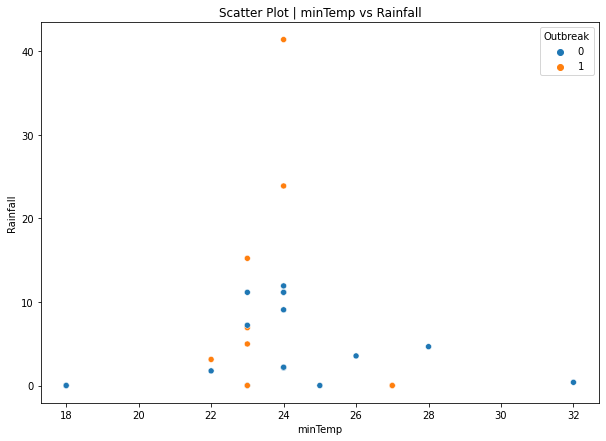

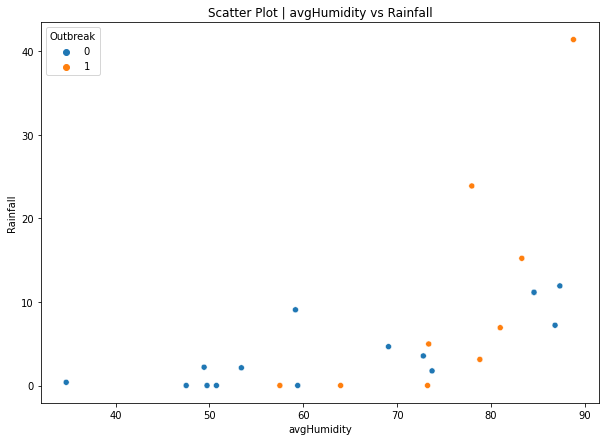

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2}")
plot_vs(df,'minTemp','Rainfall','Outbreak')
plot_vs(df,'avgHumidity','Rainfall','Outbreak')

In [71]:
#splitting the data
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [72]:
X


,maxTemp,minTemp,avgHumidity,Rainfall
0,29.0,18.0,49.74,0.00
1,34.0,23.0,83.27,15.22
2,40.0,23.0,50.74,0.00
3,33.0,24.0,84.57,11.15
4,34.0,24.0,59.16,9.06
5,34.0,27.0,73.23,0.00
6,31.0,24.0,88.77,41.40
7,33.0,24.0,77.94,23.88
8,31.0,24.0,84.57,11.15
9,36.0,24.0,53.40,2.12


In [73]:
Y

,Outbreak
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,0


In [74]:
#splitting the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [75]:
X_train

,maxTemp,minTemp,avgHumidity,Rainfall
11,34.0,18.0,59.40,0.00
7,33.0,24.0,77.94,23.88
8,31.0,24.0,84.57,11.15
19,39.0,25.0,47.52,0.00
22,30.0,23.0,86.81,7.21
2,40.0,23.0,50.74,0.00
14,43.0,28.0,69.07,4.65
1,34.0,23.0,83.27,15.22
0,29.0,18.0,49.74,0.00
5,34.0,27.0,73.23,0.00


In [76]:
X_test

,maxTemp,minTemp,avgHumidity,Rainfall
15,33.0,23.0,80.97,6.92
13,45.0,32.0,34.74,0.38
23,30.0,22.0,78.80,3.12
24,33.0,22.0,73.71,1.75
10,32.0,23.0,57.50,0.00


In [77]:
#normalizing the data-standard scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)#normalizing
X_test=sst.transform(X_test)

In [78]:
#fitting the data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [79]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [80]:
ypred=model.predict(X_test)

In [81]:
import matplotlib.pyplot as plt

In [82]:
accuracy_test=model.score(X_test,Y_test)
print(accuracy_test)

0.4


In [83]:
accuracy_train=model.score(X_train,Y_train)
print(accuracy_train)

0.8


In [88]:
accuracy=model.score(sst.transform(X),Y)
print(accuracy)

0.72


In [86]:
print(model.score(sst.transform(X),Y)*100)


72.0
